In [2]:
# We start by importing pandas and creating a Path object that points to our files.
import pandas as pd
from pathlib import Path

dirpath = Path("../../datasets/kontali")

# Country

### Read the file `country.csv` into a pandas DataFrame

Hints:
1. the function to use here is `pd.read_csv`
1. we can specify the path to `country.csv` with `os.path.join` or `pathlib.Path` from the builtin modules
1. we must use the keyword argument `encoding="latin-1"`
1. we should also specify two other keywords

In [3]:
df_country = pd.read_csv(dirpath / "country.csv",
                         encoding="latin-1",
                         delimiter=";",
                         index_col="country_code"
                        )

df_country.head()

,Country,Land,Market,Market_SBSB,Market_SLX
country_code,,,,,
AD,Andorra,Andorra,Other Europe,All others,Other
AE,United Arab Emirates,De forente Arabiske Emirater,Asia,Asia,Other
AF,Afghanistan,Afghanistan,Asia,Asia,Other
AG,Antigua and Barbuda,Antigua og Barbuda,North-America,North America,Other
AI,Anguilla,Anguilla,North-America,North America,Other


---
# Web scraping

For this part of the exercise, you may have to install an extra python package called `lxml` (for processing XML and HTML).

You can remove the comment below to install the package using this notebook, but __only if you are comfortable doing so__!

In [4]:
#!pip3 install --isolated lxml

The task is to scrape a table from the internet into a DataFrame. Specifically, we want to add `Continent` to our country dataframe. So we need a mapping from country to continent.

https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

- Table is found here: 'https://statisticstimes.com/geography/countries-by-continents.php'
- use `pd.read_html`
- to help pandas know which table you want, you can use the `match` argument
- try to make the final dataframe look like the screenshot below.

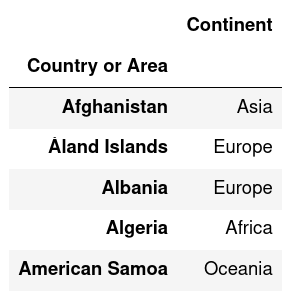

In [5]:
table_continents = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php', match="Countries or Areas")

df_cont = table_continents[0]
df_cont = df_cont.set_index("Country or Area")[["Continent"]]
df_cont.head()

,Continent
Country or Area,
Afghanistan,Asia
Åland Islands,Europe
Albania,Europe
Algeria,Africa
American Samoa,Oceania


### Using `DataFrame.join()`, add `Continent` column to `df_country`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [7]:
df_country = df_country.join(df_cont, on="Country", how="left")
df_country.head()

,Country,Land,Market,Market_SBSB,Market_SLX,Continent
country_code,,,,,,
AD,Andorra,Andorra,Other Europe,All others,Other,Europe
AE,United Arab Emirates,De forente Arabiske Emirater,Asia,Asia,Other,Asia
AF,Afghanistan,Afghanistan,Asia,Asia,Other,Asia
AG,Antigua and Barbuda,Antigua og Barbuda,North-America,North America,Other,North America
AI,Anguilla,Anguilla,North-America,North America,Other,North America
